In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.metrics import r2_score

https://stackoverflow.com/questions/78308988/how-do-i-fit-an-exponential-3d-surface-to-measured-data

In [2]:
x = np.array([0.25, 0.333333, 0.5])
y = np.array([0.3, 0.4, 0.5, 0.6, 0.7])
X, Y = np.meshgrid(x, y)

In [3]:
Z = np.array([
    [1.0183786345931547, 1.0299586760768078, 1.038641346963767, 1.0450398412805133, 1.194598528164483],
    [1.0498980141678536, 1.0740481275807727, 1.101990429736493, 1.1528998376687427, 1.4439775675193383],
    [1.072406763443829, 1.150808521648661, 1.2306731013044911, 1.3516512408949992, 1.8936625169205694]
]).T

In [4]:
r = np.vstack([
    X.ravel(),
    Y.ravel()
])

In [5]:
z = Z.ravel()

In [6]:
def model(x, a, b, c):
    return a + b * x[0] ** 2 * np.exp(c * x[1])

In [7]:
popt, pcov = optimize.curve_fit(model, r, z)
popt, pcov

(array([1.0159712 , 0.01266741, 8.01357538]),
 array([[ 3.10966405e-04, -9.88561187e-05,  1.05412903e-02],
        [-9.88561187e-05,  6.33942361e-05, -7.06456010e-03],
        [ 1.05412903e-02, -7.06456010e-03,  7.91614346e-01]]))

In [8]:
zhat = model(r, *popt)
Zhat = zhat.reshape(Z.shape)

In [9]:
score = r2_score(z, zhat)
score

0.9746146254532012

In [10]:
xlin = np.linspace(x.min(), x.max(), 50)
ylin = np.linspace(y.min(), y.max(), 50)
Xlin, Ylin = np.meshgrid(xlin, ylin)
rlin = np.vstack([
    Xlin.ravel(),
    Ylin.ravel()
])
zlin = model(rlin, *popt)
Zlin = zlin.reshape(Xlin.shape)

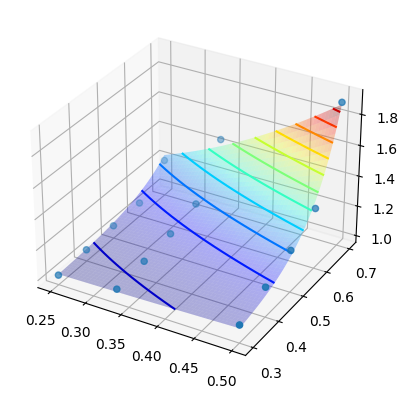

In [11]:
fig, axe = plt.subplots(subplot_kw={"projection": "3d"})
axe.scatter(X, Y, Z)
axe.plot_surface(Xlin, Ylin, Zlin, alpha=0.3, cmap="jet")
axe.contour(Xlin, Ylin, Zlin, 10, cmap="jet")